In [53]:
import os
import pickle as pkl
from pathlib import Path
from typing import Literal
from pprint import pprint
import matplotlib.pyplot as plt
from enum import Enum

In [9]:
pkl_dir = Path('pkls')

In [62]:
def plot_graph(file, properties:list[str], num_steps:int = 5_000_000):
    def remove_nones(input_list):
        return [x for x in input_list if x is not None]


    # unpickle the file
    with open(file, 'rb') as f:
        data = pkl.load(f)


    data_points = [data[property][:num_steps] for property in properties]
    data_points = [remove_nones(data_point) for data_point in data_points]

    for i, data_point in enumerate(data_points):
        # divide num_steps by the length of the data_point to get the x-axis
        x = [num_steps // len(data_point) * i for i in range(len(data_point))]

        plt.plot(x, data_point)
        plt.xlabel('Steps')
        plt.ylabel(properties[i])
        plt.legend()
        plt.show()


In [24]:
# print all folders in the directory using pathlib
models = [folder for folder in pkl_dir.iterdir()]

models

[PosixPath('pkls/SAC_3M_singleConstraintSpeed'),
 PosixPath('pkls/SAC_10M_AllContraints_D_Part'),
 PosixPath('pkls/TD3_5M_allConstraints_No_b'),
 PosixPath('pkls/TD3_10M_AllConstraints_D_Part'),
 PosixPath('pkls/SAC_3M_singleConstraintEnergy'),
 PosixPath('pkls/SAC_5M_allConstraints_No_b_No_s'),
 PosixPath('pkls/TD3_3M_singleConstraintSpeed'),
 PosixPath('pkls/TD3_3M_singleConstraintEnergy'),
 PosixPath('pkls/SAC_3M_singleConstraintGround'),
 PosixPath('pkls/SAC_3M_singleConstraintLava'),
 PosixPath('pkls/SAC_3M_singleConstraintMarker'),
 PosixPath('pkls/TD3_5M_allConstraints_No_b_No_s'),
 PosixPath('pkls/SAC_5M_allConstraints_No_b'),
 PosixPath('pkls/TD3_3M_singleConstraintLava'),
 PosixPath('pkls/TD3_3M_singleConstraintMarker'),
 PosixPath('pkls/TD3_3M_singleConstraintGround')]

/tmp/ipykernel_343141/156918940.py:8: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pkl.load(f)
/tmp/ipykernel_343141/156918940.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


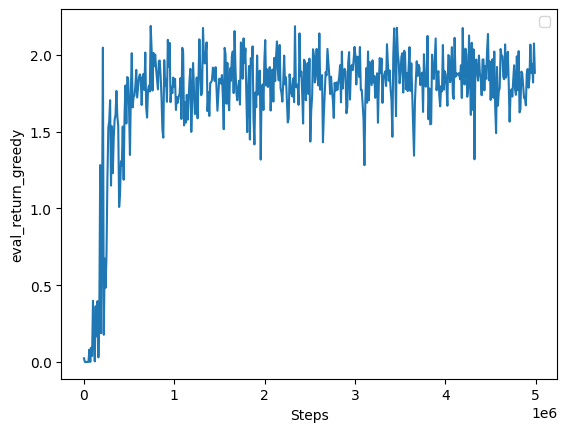

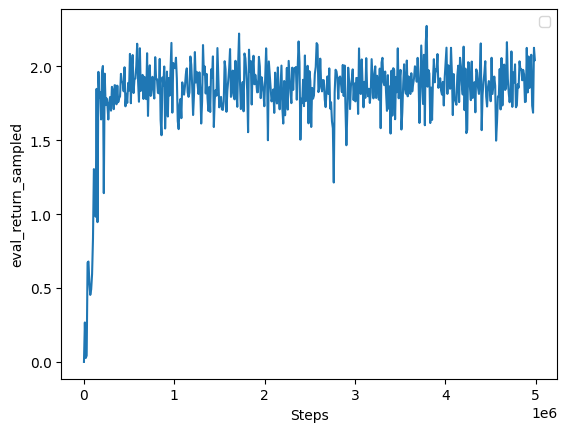

In [63]:
plot_graph("pkls/SAC_10M_AllContraints_D_Part/train_recorder.pkl", ["eval_return_greedy", "eval_return_sampled"])

In [49]:
list(tmp)

['alpha_loss',
 'q2_loss_3',
 'eval_greedy_constraint_1',
 'cost_weight_4',
 'multiplier_logit_4',
 'multiplier_logit_0',
 'q2_loss_6',
 'online_avg_summed_constraint_4',
 'reward_4',
 'eval_greedy_constraint_4',
 'online_avg_summed_constraint_5',
 'multiplier_logit_6',
 'multiplier_logit_1',
 'q1_loss_1',
 'online_avg_summed_constraint_6',
 'eval_sampled_constraint_6',
 'eval_sampled_constraint_2',
 'episode_i',
 'cost_weight_3',
 'eval_episode_i',
 'multiplier_logit_5',
 'reward_6',
 'online_avg_summed_constraint_2',
 'q2_loss_0',
 'eval_total_steps',
 'eval_return_greedy',
 'eval_greedy_constraint_6',
 'eval_greedy_constraint_3',
 'reward_weight',
 'total_steps',
 'policy_entropy',
 'wallclock_time',
 'q2_loss_5',
 'eval_sampled_constraint_3',
 'online_avg_summed_constraint_3',
 'q1_loss_3',
 'pi_loss',
 'train_return',
 'update_i_actor',
 'alpha',
 'reward_0',
 'update_i_agent',
 'q1_loss_2',
 'eval_return_sampled',
 'q2_loss_2',
 'reward_5',
 'eval_sampled_constraint_5',
 'q2_loss

In [50]:
tmp2 = (plot_graph("pkls/SAC_3M_singleConstraintLava/train_recorder.pkl", ["eval_return"], "lr"))

/tmp/ipykernel_343141/2957891953.py:8: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pkl.load(f)


In [52]:
list(tmp2)

['update_i_multipliers',
 'reward_0',
 'alpha_loss',
 'policy_entropy',
 'pi_loss',
 'eval_sampled_constraint_1',
 'update_i_critic',
 'wallclock_time',
 'eval_episode_i',
 'episode_len',
 'cost_weight_1',
 'update_i_agent',
 'eval_return_greedy',
 'total_policy_loss',
 'multiplier_logit_0',
 'q2_loss_1',
 'reward_1',
 'eval_return_sampled',
 'q1_loss_0',
 'total_steps',
 'train_return',
 'episode_time',
 'eval_total_steps',
 'episode_i',
 'reward_weight',
 'q2_loss_0',
 'eval_greedy_constraint_1',
 'multiplier_logit_1',
 'q1_loss_1',
 'alpha',
 'online_avg_summed_constraint_1',
 'update_i_actor']